In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.stats.proportion import proportion_confint # Tính khoảng tin cậy
import sys
import os
import pandas as pd
import numpy as np

In [25]:
sys.path.append(os.path.abspath(os.path.join('..', 'utils')))

# Lấy thư mục hiện tại
current_directory = os.getcwd()
folder_path1 = os.path.join(current_directory,'../../data/train_test')

In [26]:
x = pd.read_csv(f'{folder_path1}/xtrain_data.csv')
y = pd.read_csv(f'{folder_path1}/xtest_data.csv')
z = pd.read_csv(f'{folder_path1}/ytrain_data.csv')
t = pd.read_csv(f'{folder_path1}/ytest_data.csv')

x_train = x.loc[:, ['PC 1']].values
x_test = y.loc[:, ['PC 1']].values

y_train = z['drop_out'].values
y_test = t['drop_out'].values





In [27]:
# Chuyển đổi y_train thành nhãn phân loại.
y_train_class = np.where(y_train >= 0.5, 1, 0)
y_test_class = np.where(y_test >= 0.5, 1, 0)

In [28]:
len(y_test_class)

126

In [29]:
LR_model = LogisticRegression()
LR = LR_model.fit(x_train, y_train_class)
y_pred = LR_model.predict(x_test)

In [30]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [31]:
x_test.shape

(126, 1)

In [32]:
x_train.shape

(504, 1)

In [33]:
# Lấy các hệ số của mô hình
coefficients = LR.coef_
# Lấy hệ số chặn (intercept)
intercept = LR.intercept_
print("Hệ số (coefficients):", coefficients)
print("Hệ số chặn (intercept):", intercept)

Hệ số (coefficients): [[6.25293736]]
Hệ số chặn (intercept): [0.3875457]


In [34]:
# Đánh giá mô hình Logistic Regression
accuracy = accuracy_score(y_test_class, y_pred)
conf_matrix = confusion_matrix(y_test_class, y_pred)
class_report = classification_report(y_test_class, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 1.0
Confusion Matrix:
[[63  0]
 [ 0 63]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        63

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [35]:
from sklearn.dummy import DummyClassifier # mô hình cơ sỏ
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
baseline_prediction = dummy_clf.predict(x_test)
baseline_accuracy = accuracy_score(y_test_class, np.where(baseline_prediction==np.unique(baseline_prediction)[0],0,baseline_prediction))

In [36]:
print("Model accuracy:", accuracy)
print("Baseline accuracy:", baseline_accuracy)

Model accuracy: 1.0
Baseline accuracy: 0.5


In [37]:
# Độ chính xác toàn thể: (TN+TP)/N
overall_accuracy = round((63+63)/x_test.shape[0] * 100,2)
print("Độ chính xác toàn thể: ", overall_accuracy)
# Sai số toàn thể
overall_mistake = round((0+0)/x_test.shape[0] * 100,2)
print("Sai số toàn thể: ", overall_mistake)

# Độ nhạy - % dự đoán chính xác sinh viên thôi học: TP/(TP+FN)
sensitivity = (63/(63+0)) * 100
print("Độ nhạy: ", sensitivity)

# Sai số của dự đoán sinh viên thôi TP/(TP+FN) hoặc 1 - độ nhạy
mistake = 100 - sensitivity
print("Tỉ lệ mô hình dự đoán sai sinh viên nghỉ học: ", mistake)
 
# Độ đặc hiệu (specificity), % dự đoán sinh viên không thôi học: TN/(TN+FP)
specificity = (63/(63+0))*100
print("Độ đặc hiệu: ", specificity)
mistake_specificity = 100 - specificity
print("Sai số tỉ lệ mô hình dự đoán chính xác sinh viên không thôi học: ", mistake_specificity)

Độ chính xác toàn thể:  100.0
Sai số toàn thể:  0.0
Độ nhạy:  100.0
Tỉ lệ mô hình dự đoán sai sinh viên nghỉ học:  0.0
Độ đặc hiệu:  100.0
Sai số tỉ lệ mô hình dự đoán chính xác sinh viên không thôi học:  0.0


In [38]:
student_id = y.iloc[:, 1]
df_pred = pd.concat([student_id,pd.DataFrame(y_test_class)], axis = 1).rename(columns = {0: 'drop_out'})
df_pred.rename(columns = {0: 'drop_out'}, inplace=True)

In [39]:
# Kết quả dự đoán
df_pred[df_pred['drop_out']==1]

,student_id,drop_out
0,2101000840,1
1,1908681570,1
2,2029775814,1
3,2117481481,1
5,2000000986,1
...,...,...
114,2056618677,1
115,2000004787,1
117,2063054317,1
122,2000000487,1


In [40]:
lower_bound, upper_bound = proportion_confint(sum(y_pred), len(y_pred), alpha=0.05, method='wilson')

In [41]:
print(f'lower_bound: {lower_bound: .4f}' )
print(f'upper_bound: {upper_bound: .4f}' )

lower_bound:  0.4140
upper_bound:  0.5860


In [42]:
# lower_bound và upper_bound thấp cho thấy khả năng cao tin tưởng dự đoán này.

In [43]:
class_report = classification_report(y_test_class, y_pred, output_dict=True)
df_class_report_df = pd.DataFrame(class_report)
df_class_report_df.to_csv('../visualization/data/logistic_regr.csv')

# So sánh các chỉ số LR

In [44]:
# Thời gian huấn luyện và dự đoán cho Logistic Regression
# Đo thời gian huấn luyện
import time
start = time.time()
LR_model = LogisticRegression()
LR = LR_model.fit(x_train, y_train_class)
end = time.time()
train_time = end - start
print(f'Time to train the model: {train_time: .4f} seconds')

# Đo thời gian dự đoán
start = time.time()
y_pred = LR_model.predict(x_test)
end = time.time()
predict_time = end - start
print(f'Time to make predictions: {predict_time: .4f} seconds')

Time to train the model:  0.0030 seconds
Time to make predictions:  0.0010 seconds


In [45]:
# Đo sử dụng bộ nhớ cho Logistic Regression
import memory_profiler

mem_before = memory_profiler.memory_usage()
print(f'Memory usage before: {mem_before[0]} MB')
LR = LR_model.fit(x_train, y_train_class)
mem_after = memory_profiler.memory_usage()
print(f'Memory usage after: {mem_after[0]} MB')

memo_usage = mem_after[0] - mem_before[0]

print(f'Memory usage: {memo_usage: .4f} MB')

Memory usage before: 167.484375 MB
Memory usage after: 167.484375 MB
Memory usage:  0.0000 MB


In [46]:
# Đo độ ổn định với cross-validation cho Logistic Regression
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR_model, x_train, y_train_class, cv=5)
# print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean(): .4f}')
print(f'Standard deviation of cross-validation score: {scores.std(): .4f}')

Mean cross-validation score:  0.9960
Standard deviation of cross-validation score:  0.0049


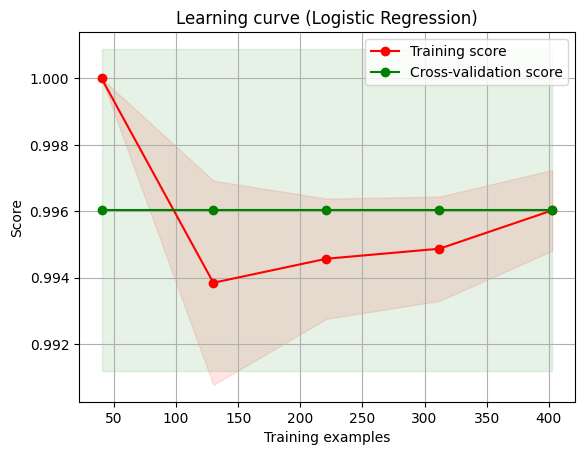

In [47]:
# Vẽ learning curve cho Logistic Regression
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(LR_model, x_train, y_train_class, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning curve (Logistic Regression)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid()


plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc='best')
plt.show()

In [48]:

print(train_scores_mean)
print(train_scores_std)
print(test_scores_mean)
print(test_scores_std)

[1.         0.99384615 0.99457014 0.99487179 0.99602978]
[0.         0.00307692 0.00180995 0.00157019 0.00121563]
[0.9960396 0.9960396 0.9960396 0.9960396 0.9960396]
[0.00485047 0.00485047 0.00485047 0.00485047 0.00485047]
